Load Data

In [40]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Check the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Cleaning

In [41]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if needed)
df = df.dropna()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [42]:
# Drop the 'customerID' column
df = df.drop(columns=['customerID'])

In [43]:
# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, drop_first=True)

# Check the transformed data
print(df.head())

   SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
0              0       1           29.85        False         True   
1              0      34           56.95         True        False   
2              0       2           53.85         True        False   
3              0      45           42.30         True        False   
4              0       2           70.70        False        False   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0           False             False                            True   
1           False              True                           False   
2           False              True                           False   
3           False             False                            True   
4           False              True                           False   

   MultipleLines_Yes  InternetService_Fiber optic  ...  TotalCharges_996.45  \
0              False                        False  ...                Fal

In [44]:
# Drop TotalCharges columns created by one-hot encoding
df = df.drop(columns=[col for col in df.columns if 'TotalCharges' in col and col != 'TotalCharges'])


In [46]:
# Load the original dataset again (only if 'TotalCharges' is missing in cleaned data)
df_raw = pd.read_csv('Telco-Customer-Churn.csv')

# Restore 'TotalCharges' column into the cleaned dataset
df['TotalCharges'] = df_raw['TotalCharges']

In [47]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,TotalCharges
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,29.85
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,1889.5
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,True,108.15
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,1840.75
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,True,False,True,False,True,151.65


Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Churn_Yes', axis=1)  # Drop target column 'Churn'
y = df['Churn_Yes']  # Target variable 'Churn'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Check the shape to verify split


(5634, 30) (1409, 30)


In [65]:
# Check for non-numeric data in X_test
print(X_test.dtypes)

# Optionally check for any string data in X_test
print(X_test.select_dtypes(include=['object']).head())


SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No internet service             bool
StreamingTV_Yes     

In [66]:
# Convert all columns to numeric, forcing errors to NaN
X_test = X_test.apply(pd.to_numeric, errors='coerce')


Model Training

In [70]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=2000)

# Train the model
model.fit(X_train, y_train)

# Check accuracy on training data
train_accuracy = model.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy}')


Training Accuracy: 0.80386936457224


d:\Git Hub Project\Spam Email Detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
# Fill NaN values in X_test with the mean of each column
X_test.fillna(X_test.mean(), inplace=True)


In [75]:
# Check if there are NaN values in X_test
print(X_test.isnull().sum())

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_On

Accuracy: 0.8211497515968772
Precision: 0.6850152905198776
Recall: 0.6005361930294906
F1-Score: 0.64
Confusion Matrix:
 [[933 103]
 [149 224]]


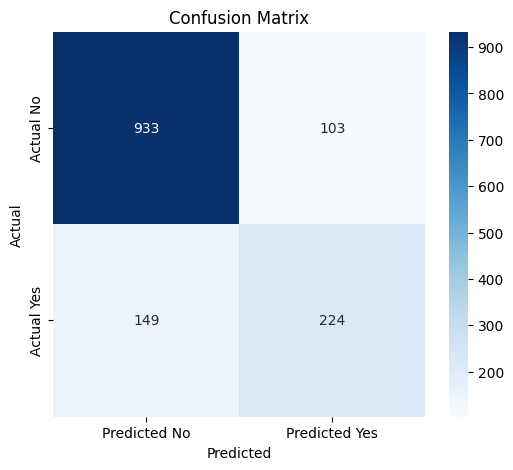

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [77]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_data.csv', index=False)
